# Logistic Regression Analysis

This Jupyter Notebook practices the use of Logistic Regression method in Scikit-Learn. 

Based on the idea in 
https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a 

Written by Shing Chi Leung at 24 Feb 2021

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix



I use the written digits from the sklearn dataset.

In [ ]:
digits = load_digits()

In [ ]:
print("Image data shape: {}".format(digits.data.shape))
print("Label data shape: {}".format(digits.target.shape))

Image data shape: (1797, 64)
Label data shape: (1797,)


In [ ]:
print(digits.data[1])
print(digits.target[1])

[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
1


The digits are an array of 8x8=64 array, with intensity ranging from 0 - 16. 

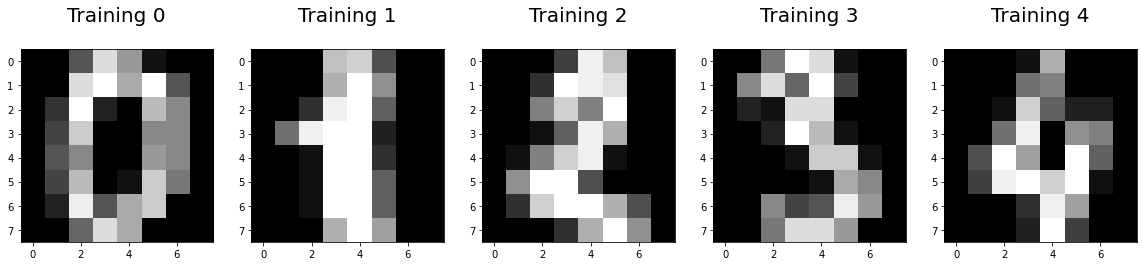

In [ ]:
plt.figure(figsize=(20,4))

for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1, 5, index+1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title("Training {}\n".format(label), fontsize=20)

Then, I build the MinMaxScaler and train it with the digits data. 

In [ ]:
minMaxScaler = MinMaxScaler()
minMaxScaler.fit(digits.data)
digits_scaled = minMaxScaler.transform(digits.data)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(digits_scaled, digits.target, test_size=0.25)

In [ ]:
logReg = LogisticRegression(max_iter=200)
logReg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

I will use the trained model to predict the test set. 

In [ ]:
y_pred = logReg.predict(x_test)

In [ ]:
df = pd.DataFrame(data={"actual":y_test, "predicted":y_pred})
df.head(5)

,actual,predicted
0,7,7
1,1,1
2,3,3
3,3,3
4,1,1


In [ ]:
# Use score method to get accuracy of model
score = logReg.score(x_test, y_test)
print(score)

0.9622222222222222


The trained model has a very high accuracy about 96%. Then we study the accuracy of the model based on standardized test. First  we study the confusion matrix. 

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[32  0  0  0  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  1  0  0  4]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 55  0  1  0  0  0  0]
 [ 0  0  0  0 53  0  0  0  0  0]
 [ 1  1  0  0  0 35  1  0  0  1]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  1]
 [ 0  4  0  0  0  0  0  0 35  0]
 [ 0  0  0  0  0  0  0  0  1 39]]


Text(0.5, 1.0, 'Accuracy Score: 0.9622222222222222')

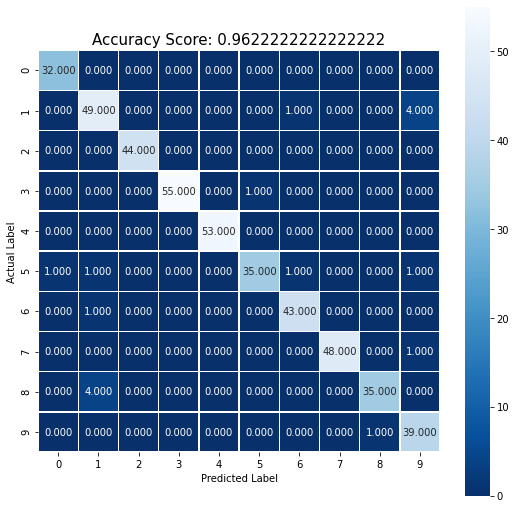

In [ ]:
plt.figure(figsize=(9,9))

sns.heatmap(cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap="Blues_r")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15)

We can observe that most digits can be identified with a high accuracy. The largest error occurs between 1 and 9. Then I use another way to plot the confusion matrix. 

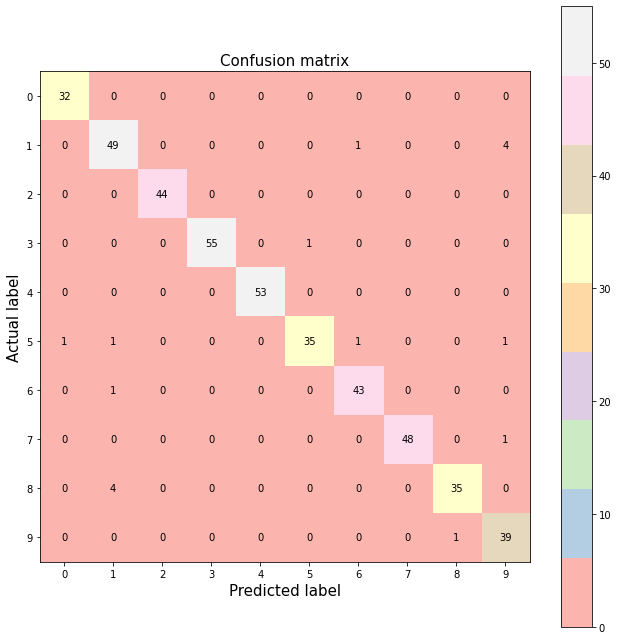

In [ ]:
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')

plt.title('Confusion matrix', size = 15)
plt.colorbar()

tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10) # muted rotation=45
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()

plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape

for x in range(width):
  for y in range(height):
    plt.annotate(str(cm[x][y]), xy=(y,x), horizontalalignment="center", verticalalignment="center")